In [46]:
import pandas as pd

# 날짜 컬럼 방지
def read_csv_auto_dates(path):
    # 1) 전체 파일을 먼저 읽기
    temp = pd.read_csv(path, low_memory=False)
    
    # 2) _at 로 끝나는 컬럼 자동 탐지
    date_cols = [col for col in temp.columns if col.endswith('_at')]
    
    # 3) 다시 날짜 컬럼을 datetime 으로 읽기
    return pd.read_csv(path, parse_dates=date_cols, low_memory=False)

# Load Files (전처리)
vc_base = read_csv_auto_dates("./ml_join/vc_base.csv")

print("="*60)
print("Dataset 로드 완료!")
print("="*60)

Dataset 로드 완료!


## 결측치 처리

In [47]:
vc_base.isnull().sum()

investor_cfp_id                   0
first_investment_at              79
last_investment_at               79
investment_rounds                71
invested_companies               71
relationships                    71
investment_span_years            79
investment_span_years_adj         0
avg_annual_rounds              3509
avg_annual_companies           3509
avg_invest_gap_months_est      3509
startup_industry_top1            14
startup_industry_top1_share      14
startup_industry_count            0
startup_city_top1               328
startup_city_top1_share         328
startup_city_count                0
founder_degree_level_mean      4861
founder_institution_top1       4737
followon_startup_cnt              0
total_startup_cnt                 0
followon_ratio                    0
favorite_round_type               0
dtype: int64

In [48]:
cluster_features = [
    "investment_rounds",  # 71 : vc가 참여한 총 라운드 수 
    "invested_companies", # 71 : vc가 투자한 총 회사 수 
    "relationships",  # 71 : vc의 직원 수
    "investment_span_years", # 79 : vc의 투자 활동 기간
    "avg_annual_rounds", #3509 : vc의 연간 평균 투자 라운드 수
    "avg_annual_companies", #3509 : vc의 연간 평균 투자 회사 수
    "avg_invest_gap_months_est", #3509 : vc의 평균 투자 간격
    "followon_ratio", # : 재투자율
    "startup_industry_count", # 투자한 산업 수 
    "startup_city_count", # 투자한 도시 수
    "founder_degree_level_mean", # 투자한 창업자의 학위 레벨
    "favorite_round_type"  # --> 인코딩 # 라운드 -> 원핫 인코딩 
]

In [49]:
#############
# 결측치 계획
#############

# # 연속형 변수 로그 변환
# # 결측치 중앙값 대체 :2 (근거자료) -> 결측치 플래그 
# vc_base['investment_rounds'].value_counts()
# # 결측치 중앙값 대체 :2 (근거자료) -> 결측치 플래그
# vc_base['invested_companies'].value_counts()
# # 결측치 중앙값 대체 :0 (근거자료) -> 결측치 플래그
# vc_base['relationships'].value_counts()
# # 결측치 중앙값 대체 :0.5 (근거자료) -> 결측치 플래그
# vc_base['investment_span_years'].value_counts()
# # 결측치 중앙값 대체 :2 (근거자료) -> 결측치 플래그
# vc_base['avg_annual_rounds'].value_counts()
# # 결측치 중앙값 대체 :1.6 (근거자료) -> 결측치 플래그
# vc_base['avg_annual_companies'].value_counts()
# # 결측치 중앙값 대체 :8 (근거자료) -> 결측치 플래그
# vc_base['avg_invest_gap_months_est'].value_counts()

<Axes: >

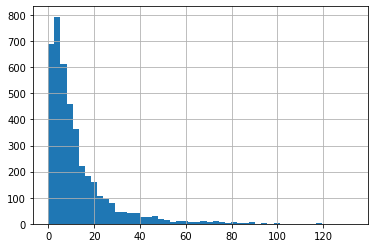

In [50]:
vc_base['avg_invest_gap_months_est'].hist(bins=50)

In [51]:
vc_base['avg_invest_gap_months_est'].describe()

count    4162.000000
mean       12.636662
std        14.571271
min         0.016426
25%         3.810775
50%         7.900788
75%        15.571616
max       132.785808
Name: avg_invest_gap_months_est, dtype: float64

In [52]:
vc_base

,investor_cfp_id,first_investment_at,last_investment_at,investment_rounds,invested_companies,relationships,investment_span_years,investment_span_years_adj,avg_annual_rounds,avg_annual_companies,...,startup_industry_count,startup_city_top1,startup_city_top1_share,startup_city_count,founder_degree_level_mean,founder_institution_top1,followon_startup_cnt,total_startup_cnt,followon_ratio,favorite_round_type
0,f:1,2000-03-01,2013-12-05,307.0,196.0,71.0,13.763176,13.763176,22.305898,14.240899,...,32.0,san francisco,0.237458,61.0,2.846154,Stanford University,76,196,0.387755,series-c+
1,f:2,2003-11-01,2013-06-06,52.0,36.0,90.0,9.596167,9.596167,5.418830,3.751498,...,17.0,san francisco,0.423077,21.0,2.666667,"University of California, Berkeley",10,36,0.277778,series-a
2,f:4,2000-02-15,2013-12-05,479.0,289.0,119.0,13.804244,13.804244,34.699474,20.935591,...,30.0,san francisco,0.165217,104.0,2.843478,Stanford University,125,289,0.432526,series-c+
3,f:5,2003-02-01,2013-11-18,64.0,52.0,7.0,10.795346,10.795346,5.928481,4.816891,...,20.0,sunnyvale,0.107692,36.0,2.823529,Harvard University,12,52,0.230769,series-c+
4,f:6,2005-07-01,2013-12-04,130.0,102.0,32.0,8.427105,8.427105,15.426413,12.103801,...,31.0,san francisco,0.404959,32.0,2.593220,Stanford University,21,102,0.205882,series-a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7666,f:12841,2013-12-11,2013-12-11,1.0,1.0,1.0,0.000000,1.000000,NaN,NaN,...,1.0,kirkland,1.000000,1.0,NaN,NaN,0,1,0.000000,venture
7667,f:15067,2013-12-10,2013-12-10,1.0,1.0,0.0,0.000000,1.000000,NaN,NaN,...,1.0,chicago,1.000000,1.0,2.000000,Southern Methodist University - Cox School of ...,0,1,0.000000,venture
7668,f:15069,2013-12-11,2013-12-11,1.0,1.0,0.0,0.000000,1.000000,NaN,NaN,...,1.0,melville,1.000000,1.0,NaN,CW Post,0,1,0.000000,series-a
7669,f:2248,NaT,NaT,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,...,1.0,san diego,1.000000,1.0,NaN,NaN,0,1,0.000000,series-b


In [53]:
# 문자열 결측 정리
cat_cols = ['startup_industry_top1']

for c in cat_cols:
    vc_base[c] = vc_base[c].astype("string").replace(
        ["", " ", "nan", "NaN", "None", "NULL", "null", "<NA>"], pd.NA
    )

# 수치형 변환
vc_base['investment_rounds']  = pd.to_numeric(vc_base['investment_rounds'], errors='coerce')
vc_base['invested_companies'] = pd.to_numeric(vc_base['invested_companies'], errors='coerce')
vc_base['founder_degree_level_mean'] = pd.to_numeric(vc_base['founder_degree_level_mean'], errors='coerce')
vc_base['relationships'] = pd.to_numeric(vc_base['relationships'], errors='coerce')
vc_base['investment_span_years'] = pd.to_numeric(vc_base['investment_span_years'], errors='coerce')
vc_base['avg_annual_rounds'] = pd.to_numeric(vc_base['avg_annual_rounds'], errors='coerce')
vc_base['avg_annual_companies'] = pd.to_numeric(vc_base['avg_annual_companies'], errors='coerce')
vc_base['avg_invest_gap_months_est'] = pd.to_numeric(vc_base['avg_invest_gap_months_est'], errors='coerce')

# missing flag
vc_base['is_startup_industry_top1_missing']  = vc_base['startup_industry_top1'].isna().astype(int)
vc_base['is_investment_rounds_missing']  = vc_base['investment_rounds'].isna().astype(int)
vc_base['is_invested_companies_missing']  = vc_base['invested_companies'].isna().astype(int)
vc_base['is_relationships_missing']  = vc_base['relationships'].isna().astype(int)
vc_base['is_investment_span_years_missing']  = vc_base['investment_span_years'].isna().astype(int)
vc_base['is_avg_annual_rounds_missing']  = vc_base['avg_annual_rounds'].isna().astype(int)
vc_base['is_avg_invest_gap_months_est_missing']  = vc_base['avg_invest_gap_months_est'].isna().astype(int)
vc_base['is_avg_annual_companies_missing']  = vc_base['avg_annual_companies'].isna().astype(int)


# 결측 대체
vc_base['investment_rounds'] = vc_base['investment_rounds'].fillna(2)
vc_base['invested_companies'] = vc_base['invested_companies'].fillna(2)
vc_base['startup_industry_top1'] = vc_base['startup_industry_top1'].fillna("Unknown")
vc_base['relationships'] = vc_base['relationships'].fillna(0)
vc_base['investment_span_years'] = vc_base['investment_span_years'].fillna(0.5)
vc_base['avg_annual_rounds'] = vc_base['avg_annual_rounds'].fillna(2)
vc_base['avg_annual_companies'] = vc_base['avg_annual_companies'].fillna(1.6)
vc_base['avg_invest_gap_months_est'] = vc_base['avg_invest_gap_months_est'].fillna(8)

# 학위 : Unknown = -1 (순서형 유지)
vc_base['founder_degree_level_mean'] = vc_base['founder_degree_level_mean'].fillna(-1)

## 수치형 변수 로그 변환

In [54]:
# 수치형 로그변환
# 로그변환 할 컬럼들
log_cols = [
    "investment_rounds",
    "invested_companies",
    "relationships",
    "investment_span_years",
    "avg_annual_rounds",
    "avg_annual_companies",
    "avg_invest_gap_months_est",
    "followon_ratio",
    "startup_industry_count",
    "startup_city_count",
    "total_startup_cnt"
]


# 로그 변환
import numpy as np

for c in log_cols:
    vc_base[f"log1p_{c}"] = np.log1p(vc_base[c].clip(lower=0))

In [55]:
vc_base['startup_industry_top1'].value_counts()

startup_industry_top1
software            1678
biotech             1229
web                  504
mobile               498
cleantech            440
enterprise           373
ecommerce            310
advertising          281
hardware             259
games_video          236
semiconductor        194
medical              165
analytics            155
network_hosting      149
finance              122
security              96
public_relations      88
education             87
social                85
health                76
manufacturing         75
consulting            71
hospitality           69
search                54
fashion               48
news                  39
messaging             34
travel                34
real_estate           31
music                 27
automotive            26
nanotech              25
photo_video           20
transportation        16
nonprofit             14
Unknown               14
design                13
media                 12
sports                11
loc

## 범주형 구간화 후 원-핫 인코딩

In [56]:
# favorite_round_type 구간화 후 원핫 인코딩

# 버킷 설계
ROUND_BUCKET_MAP = {
    # Early
    "seed": "early",
    
    # Mid
    "series-a": "mid",
    "series-b": "mid",
    
    # Late
    "series-c+": "late",
    "post-ipo": "late",
    
    # Special
    "debt_round": "special",
    "grant": "special",
    "secondary_market": "special",
    "private-equity": "special",
    
    # unknown
    "venture": "unknown",
}

# favorite_round_type → 버킷화
vc_base["round_stage_bucket"] = (
    vc_base["favorite_round_type"]
    .map(ROUND_BUCKET_MAP)
    .fillna("other")
)

# 원핫 인코딩
X_round = pd.get_dummies(
    vc_base["round_stage_bucket"],
    prefix="round_stage",
    drop_first=False
)

In [57]:
# vc_base에 붙이기
vc_base = pd.concat(
    [vc_base, X_round],
    axis=1
)

In [58]:
vc_base

,investor_cfp_id,first_investment_at,last_investment_at,investment_rounds,invested_companies,relationships,investment_span_years,investment_span_years_adj,avg_annual_rounds,avg_annual_companies,...,log1p_followon_ratio,log1p_startup_industry_count,log1p_startup_city_count,log1p_total_startup_cnt,round_stage_bucket,round_stage_early,round_stage_late,round_stage_mid,round_stage_special,round_stage_unknown
0,f:1,2000-03-01,2013-12-05,307.0,196.0,71.0,13.763176,13.763176,22.305898,14.240899,...,0.327687,3.496508,4.127134,5.283204,late,False,True,False,False,False
1,f:2,2003-11-01,2013-06-06,52.0,36.0,90.0,9.596167,9.596167,5.418830,3.751498,...,0.245122,2.890372,3.091042,3.610918,mid,False,False,True,False,False
2,f:4,2000-02-15,2013-12-05,479.0,289.0,119.0,13.804244,13.804244,34.699474,20.935591,...,0.359439,3.433987,4.653960,5.669881,late,False,True,False,False,False
3,f:5,2003-02-01,2013-11-18,64.0,52.0,7.0,10.795346,10.795346,5.928481,4.816891,...,0.207639,3.044522,3.610918,3.970292,late,False,True,False,False,False
4,f:6,2005-07-01,2013-12-04,130.0,102.0,32.0,8.427105,8.427105,15.426413,12.103801,...,0.187212,3.465736,3.496508,4.634729,mid,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7666,f:12841,2013-12-11,2013-12-11,1.0,1.0,1.0,0.000000,1.000000,2.000000,1.600000,...,0.000000,0.693147,0.693147,0.693147,unknown,False,False,False,False,True
7667,f:15067,2013-12-10,2013-12-10,1.0,1.0,0.0,0.000000,1.000000,2.000000,1.600000,...,0.000000,0.693147,0.693147,0.693147,unknown,False,False,False,False,True
7668,f:15069,2013-12-11,2013-12-11,1.0,1.0,0.0,0.000000,1.000000,2.000000,1.600000,...,0.000000,0.693147,0.693147,0.693147,mid,False,False,True,False,False
7669,f:2248,NaT,NaT,2.0,2.0,0.0,0.500000,1.000000,2.000000,1.600000,...,0.000000,0.693147,0.693147,0.693147,mid,False,False,True,False,False


## pca

In [59]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px

selected_col=[
    "log1p_investment_rounds",  
    "log1p_invested_companies", 
    "log1p_relationships", 
    "log1p_investment_span_years", 
    "log1p_avg_annual_rounds", 
    "log1p_avg_annual_companies", 
    "log1p_avg_invest_gap_months_est", 
    "log1p_followon_ratio", 
    "log1p_total_startup_cnt",
    "log1p_startup_industry_count", 
    "log1p_startup_city_count", 
    "founder_degree_level_mean", 
    "round_stage_early",
    "round_stage_late", 
    "round_stage_mid", 
    "round_stage_special",
    "round_stage_unknown"
    ]

X=vc_base[selected_col] # 독립변수컬럼 


print(f"원본 데이터 형태: {X.shape[1]}차원")

# 1. 스케일링 -> 하는 이유: 군집모델 거리기반 모델 피처들의 단위를 맞춰주기 위해
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

# 2. PCA 모델 생성 및 2차원으로 변환
# n_components=2: 데이터를 2개의 주성분으로 축소
pca=PCA(n_components=2, random_state=42)
# fit_transform: 모델 학습 및 데이터 변환 x_reduced numpy 형태로 나옴
X_reduced=pca.fit_transform(X_scaled)

print(f"축소된 데이터 형태: {X_reduced.shape[1]}차원") # (150, 2) -> 2차원 데이터

# 3. 2D 시각화를 위해 데이터프레임으로 정리
pca_df=pd.DataFrame(data=X_reduced, columns=['PCA Component 1', 'PCA Component 2'])
pca_df['investor_cfp_id']=vc_base.loc[X.index, 'investor_cfp_id'].values


print("\n--- PCA 변환 후 데이터프레임 ---")
print(pca_df)


원본 데이터 형태: 17차원
축소된 데이터 형태: 2차원

--- PCA 변환 후 데이터프레임 ---
      PCA Component 1  PCA Component 2 investor_cfp_id
0           11.611817         1.974923             f:1
1            7.455512         0.076871             f:2
2           12.750704         2.621407             f:4
3            7.808603         0.136929             f:5
4            9.534516         2.246994             f:6
...               ...              ...             ...
7666        -1.951414         0.396135         f:12841
7667        -1.782497         0.356646         f:15067
7668        -2.022836         0.464791         f:15069
7669        -1.560663         0.264409          f:2248
7670        -1.951414         0.396135         f:15098

[7671 rows x 3 columns]


In [60]:
# pca한거 시각화해서 어떤 모델을 쓸지 방향 정하기
fig=px.scatter(
    pca_df,
    x='PCA Component 1',
    y='PCA Component 2',
    hover_data=['investor_cfp_id'], # hover_data는 리스트 형식으로 받음 (마우스 오버 시 보이는 정보)
    title='PCA 2D Visualization (Before Clustering)',
    template='plotly_white'
)

fig.show()

PCA 2차원 시각화 결과, VC들은 명확한 단일 군집이 아닌
연속적인 전략 스펙트럼 상에 분포하는 양상

= 군집이 만들어질 수 있음

In [61]:
# 90% 이상의 분산을 설명하는 최소 차원 구하기
pca_auto = PCA(n_components=0.9)
X_pca = pca_auto.fit_transform(X_scaled)

print(f"90% 분산을 유지하기 위한 최적 차원 수: {pca_auto.n_components_}")


90% 분산을 유지하기 위한 최적 차원 수: 7


# 최적의 k값 찾기
## 계층 군집

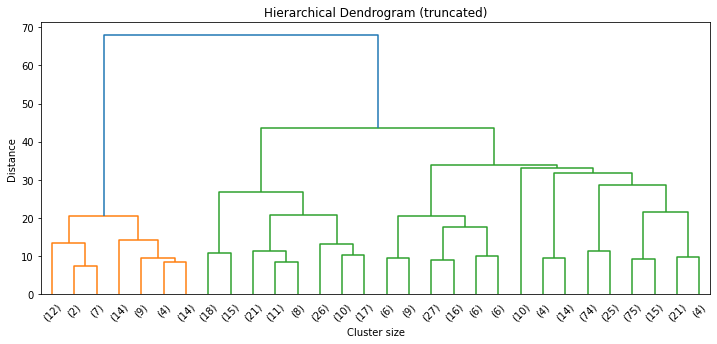

In [62]:
# 계층 군집 돌리기

from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import numpy as np

# 표본 추출 (500개)
sample_idx = np.random.choice(X_pca.shape[0], size=500, replace=False)

# numpy array → 행 샘플링
X_pca_sample = X_pca[sample_idx, :]

# Hierarchical clustering
# ward: 군집 내의 분산을 최소화
Z = linkage(X_pca_sample, method="ward")

plt.figure(figsize=(12, 5))
dendrogram(Z, truncate_mode="lastp", p=30)
plt.title("Hierarchical Dendrogram (truncated)")
plt.xlabel("Cluster size")
plt.ylabel("Distance") # 군집 간 차이
plt.show()



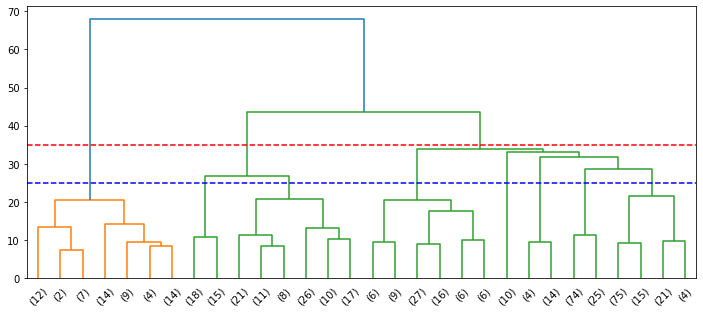

In [63]:
plt.figure(figsize=(12,5))
dendrogram(Z, truncate_mode="lastp", p=30)
plt.axhline(y=35, c="r", ls="--")  
plt.axhline(y=25, c="b", ls="--")
plt.show()


## Elbow Method

In [64]:
# Elbow Method
from sklearn.cluster import KMeans
from kneed import KneeLocator # kneed 설치 먼저하기

# wcss: 군집 내부 데이터들이 얼마나 뭉쳐있는지 나타내는 지표 
# 값이 작을수록 데이터들이 중심에 모여있다는 뜻
wcss=[]
k_range=range(2,11) #k=1 은 군집화아니니까 빼버림

# init='k-means++': 초기 중심점을 잡을 때 서로 멀리 떨어지도록 전략적으로 배치하는 알고리즘
# n_init=50: 좀 더 안정적인 결과를 위해 50으로 설정
for i in k_range:
    kmeans=KMeans(n_clusters=i, init='k-means++', n_init=50, random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_) # inertia_= WCSS 값

# 시각화하지않고 최적의 k 찾기
# curve="convex"와 direction="decreasing" 파라미터는 알고리즘에게 그래프의 전반적인 '방향성과 특징'을 알려주어, 
# 꺾이는 지점을 더 정확하고 자동적으로 찾을 수 있도록 돕는 역할
kneedle = KneeLocator(
    # k_range: x축 (군집 갯수) wcss: y축 
    k_range, wcss, curve="convex", direction="decreasing"  
)
best_k = kneedle.knee
print(f"Elbow Method에 의한 최적 K: {best_k}")

# 시각화를 통하여 wcss 그리기
fig=px.line(
    x=k_range, y=wcss,
    title="Elbow Method — K에 따른 WCSS 변화",
    labels={"x": "K (군집 개수)", "y": "WCSS"},
)
# best_k선 그리기
fig.add_shape(type="line",
               x0=best_k, x1=best_k, y0=min(wcss), y1=max(wcss),  # 시작점 (x0, y0), 끝점 (x1, y1)
              line=dict(color="red", dash="dash"))
# 주석 달기
k_idx = list(k_range).index(best_k)
fig.add_annotation(
    x=best_k,            # 주석이 위치할 X 좌표 (최적의 K 값)
    y=wcss[k_idx],  # 주석이 위치할 Y 좌표 (해당 K의 WCSS 값)
    text=f"최적 K 값: {best_k}",  # 표시할 텍스트
    showarrow=True,      # 화살표 표시 여부
    arrowcolor="red", 
    font=dict(color="black")      
)
fig.update_traces(mode='lines+markers') # k값마다 동그란 점 생성



Elbow Method에 의한 최적 K: 6


In [65]:
from sklearn.metrics import silhouette_score

# 후보군 k 생성
candidate_k = sorted(set([3,4,best_k-1,best_k,best_k+1]))
candidate_k = [k for k in candidate_k if k >= 2]

rng = np.random.RandomState(42)
sample_size = min(2000, X_pca.shape[0])  # 1000~3000 사이 추천
sample_idx = rng.choice(X_pca.shape[0], size=sample_size, replace=False)
X_pca_sample = X_pca[sample_idx]

silhouette_scores = []
for k in candidate_k:
    # K-Means 모델 학습
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(X_pca)

    #실루엣 점수 계산
    # pca의 데이터와 군집 결과를 넣음
    score = silhouette_score(
        X_pca_sample,
        labels[sample_idx],
        metric="euclidean"
    )
    silhouette_scores.append(score)

fig = px.bar(
    x=candidate_k, y=silhouette_scores,
    title="Silhouette Score — 군집 품질 비교",
    labels={"x": "K (군집 개수)", "y": "Silhouette Score"}
)

# 실루엣 기준 best k
best_k_sil = candidate_k[int(np.argmax(silhouette_scores))]
idx = candidate_k.index(best_k_sil)

fig.add_shape(type="line",
              x0=best_k_sil, x1=best_k_sil,
              y0=min(silhouette_scores), y1=max(silhouette_scores),
              line=dict(color="red", dash="dash"))

fig.add_annotation(x=best_k_sil, y=silhouette_scores[idx],
                   text=f"Best (silhouette) = {best_k_sil}",
                   showarrow=True, arrowcolor="red", font=dict(color="black"))

fig.show()

### Gap statistic

In [66]:
import numpy as np
from sklearn.cluster import KMeans

def gap_statistic(X, refs=10, max_k=10):
    """
    X: 데이터 (numpy array or DataFrame)
    refs: 랜덤 기준 데이터셋 개수
    max_k: 평가할 최대 클러스터 개수
    """
    gaps = np.zeros(max_k)
    s_k = np.zeros(max_k)
    shape = X.shape

    for k in range(1, max_k + 1):
        # 실제 데이터로 inertia 계산
        km = KMeans(n_clusters=k, random_state=42, n_init='auto').fit(X)
        disp = km.inertia_

        # 랜덤 데이터 생성 후 inertia 평균 계산
        ref_disps = np.zeros(refs)
        for i in range(refs):
            random_ref = np.random.random_sample(size=shape)
            km_ref = KMeans(n_clusters=k, random_state=i, n_init='auto').fit(random_ref)
            ref_disps[i] = km_ref.inertia_

        # Gap 계산
        log_ref = np.log(ref_disps)
        gaps[k - 1] = np.mean(log_ref) - np.log(disp)
        s_k[k - 1] = np.std(log_ref) * np.sqrt(1 + 1 / refs)

    # 최적 K 찾기
    for k in range(max_k - 1):
        if gaps[k] >= gaps[k + 1] - s_k[k + 1]:
            best_k = k + 1
            break
    else:
        best_k = np.argmax(gaps) + 1

    return best_k, gaps


Gap Statistic 기준 최적 K: 10


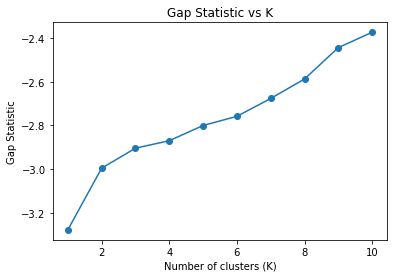

In [67]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Gap Statistic 실행
# refs = 10 : 무작위 기준 데이터셋을 몇 번 생성해서 평균 낼지 ? -> 샘플링 횟수
# max_k = 10 : 몇개의 클러스터 k 를 테스트 할지 (1~10)
best_k, gaps = gap_statistic(X_pca, refs=10, max_k=10)
print(f"Gap Statistic 기준 최적 K: {best_k}")

# 시각화
plt.plot(range(1, 11), gaps, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic vs K')
plt.show()

## 최종 k-means

In [68]:
#  최종 K-Means 모델 학습 및 라벨 생성

final_kmeans = KMeans(n_clusters=6, init='k-means++', n_init=10, random_state=42)
final_kmeans.fit(X_pca)
labels = final_kmeans.predict(X_pca) # 각 데이터 포인트의 군집 라벨

#  PCA를 이용한 2D 차원 축소
pca = PCA(n_components=2) # 2개의 주성분으로 축소
X_reduced = pca.fit_transform(X_scaled) # 원본 데이터를 2D로 변환 

pca_df=pd.DataFrame(data=X_reduced, columns=['PCA Component 1', 'PCA Component 2'])
pca_df['cluster'] = labels.astype(str)  # ← 컬럼으로 붙이기

# pca한거 시각화해서 어떤 모델을 쓸지 방향 정하기
fig=px.scatter(
    pca_df,
    x='PCA Component 1',
    y='PCA Component 2',
    color='cluster',
    hover_data=['cluster'], # hover_data는 리스트 형식으로 받음 (마우스 오버 시 보이는 정보)
    title='PCA 2D Visualization (After Clustering)',
)

fig.show()

In [69]:
# K=6으로 KMeans 학습 + 라벨 생성
from sklearn.cluster import KMeans

k = 6
kmeans6 = KMeans(n_clusters=k, init="k-means++", n_init=50, random_state=42)

cluster_labels = kmeans6.fit_predict(X_pca)   # 군집은 X_pca(군집용) 기준

# pca_df에 cluster 컬럼 추가
pca_df["cluster"] = cluster_labels


In [70]:
# vc_base에 cluster 컬럼 추가
vc_base["cluster"] = cluster_labels

In [71]:
pca_df["cluster"].value_counts().sort_index()

cluster
0    1597
1    1118
2    1705
3     269
4     897
5    2085
Name: count, dtype: int64

In [72]:
vc_base

,investor_cfp_id,first_investment_at,last_investment_at,investment_rounds,invested_companies,relationships,investment_span_years,investment_span_years_adj,avg_annual_rounds,avg_annual_companies,...,log1p_startup_industry_count,log1p_startup_city_count,log1p_total_startup_cnt,round_stage_bucket,round_stage_early,round_stage_late,round_stage_mid,round_stage_special,round_stage_unknown,cluster
0,f:1,2000-03-01,2013-12-05,307.0,196.0,71.0,13.763176,13.763176,22.305898,14.240899,...,3.496508,4.127134,5.283204,late,False,True,False,False,False,1
1,f:2,2003-11-01,2013-06-06,52.0,36.0,90.0,9.596167,9.596167,5.418830,3.751498,...,2.890372,3.091042,3.610918,mid,False,False,True,False,False,1
2,f:4,2000-02-15,2013-12-05,479.0,289.0,119.0,13.804244,13.804244,34.699474,20.935591,...,3.433987,4.653960,5.669881,late,False,True,False,False,False,1
3,f:5,2003-02-01,2013-11-18,64.0,52.0,7.0,10.795346,10.795346,5.928481,4.816891,...,3.044522,3.610918,3.970292,late,False,True,False,False,False,1
4,f:6,2005-07-01,2013-12-04,130.0,102.0,32.0,8.427105,8.427105,15.426413,12.103801,...,3.465736,3.496508,4.634729,mid,False,False,True,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7666,f:12841,2013-12-11,2013-12-11,1.0,1.0,1.0,0.000000,1.000000,2.000000,1.600000,...,0.693147,0.693147,0.693147,unknown,False,False,False,False,True,0
7667,f:15067,2013-12-10,2013-12-10,1.0,1.0,0.0,0.000000,1.000000,2.000000,1.600000,...,0.693147,0.693147,0.693147,unknown,False,False,False,False,True,0
7668,f:15069,2013-12-11,2013-12-11,1.0,1.0,0.0,0.000000,1.000000,2.000000,1.600000,...,0.693147,0.693147,0.693147,mid,False,False,True,False,False,5
7669,f:2248,NaT,NaT,2.0,2.0,0.0,0.500000,1.000000,2.000000,1.600000,...,0.693147,0.693147,0.693147,mid,False,False,True,False,False,5


In [73]:
cluster_cols = [
    #"investor_cfp_id",
    "investment_rounds",  # 71 : vc가 참여한 총 라운드 수 
    "invested_companies", # 71 : vc가 투자한 총 회사 수 
    "relationships",  # 71 : vc의 직원 수
    "investment_span_years", # 79 : vc의 투자 활동 기간
    "avg_annual_rounds", #3509 : vc의 연간 평균 투자 라운드 수
    "avg_annual_companies", #3509 : vc의 연간 평균 투자 회사 수
    "avg_invest_gap_months_est", #3509 : vc의 평균 투자 간격
    "followon_ratio", # : 재투자율
    #"startup_industry_top1", # 산업
    "startup_industry_count", # 투자한 산업 수 
    #"startup_city_top1", # 도시
    "startup_city_count", # 투자한 도시 수
    "founder_degree_level_mean", # 투자한 창업자의 학위 레벨
    #"founder_institution_top1", # 학교
    #"favorite_round_type",  # --> 인코딩 # 라운드 -> 원핫 인코딩 
    #"round_stage_bucket"
]

In [74]:
cluster_profile_num = (
    vc_base
    .groupby("cluster")[cluster_cols]
    .mean()
    .round(2)
)

cluster_profile_num


,investment_rounds,invested_companies,relationships,investment_span_years,avg_annual_rounds,avg_annual_companies,avg_invest_gap_months_est,followon_ratio,startup_industry_count,startup_city_count,founder_degree_level_mean
cluster,,,,,,,,,,,
0,1.46,1.42,0.73,0.31,4.12,3.77,8.38,0.02,1.26,1.21,-0.53
1,40.65,28.73,17.96,7.23,6.94,5.23,3.69,0.25,10.08,15.58,2.60
2,4.83,3.82,2.78,4.73,1.18,0.91,21.73,0.29,2.80,3.16,0.70
3,1.70,1.60,1.49,0.52,3.48,3.11,8.68,0.04,1.43,1.48,-0.09
4,2.14,2.00,1.14,0.69,4.74,4.40,8.51,0.06,1.79,1.50,0.32
5,1.40,1.36,0.93,0.20,4.68,4.05,7.75,0.03,1.25,1.19,-0.23


In [75]:
cluster_industry = (
    vc_base
    .groupby("cluster")["startup_industry_top1"]
    .agg(lambda x: x.value_counts().idxmax())
    .rename("top_industry")
)

cluster_industry


cluster
0    software
1    software
2    software
3    software
4    software
5    software
Name: top_industry, dtype: string

In [76]:
cluster_city = (
    vc_base
    .groupby("cluster")["startup_city_top1"]
    .agg(lambda x: x.value_counts().idxmax())
    .rename("top_city")
)

cluster_city


cluster
0           london
1    san francisco
2    san francisco
3         new york
4    san francisco
5    san francisco
Name: top_city, dtype: object

In [77]:
cluster_institution = (
    vc_base
    .groupby("cluster")["founder_institution_top1"]
    .agg(lambda x: x.value_counts().idxmax())
    .rename("top_institution")
)

cluster_institution


cluster
0    University of California, Los Angeles (UCLA)
1                             Stanford University
2                             Stanford University
3                              Harvard University
4                             Stanford University
5                             Stanford University
Name: top_institution, dtype: object

In [78]:
cluster_round_type = (
    vc_base
    .groupby("cluster")["favorite_round_type"]
    .agg(lambda x: x.value_counts().idxmax())
    .rename("top_round_type")
)

cluster_round_type

cluster
0       venture
1     series-c+
2       venture
3    debt_round
4          seed
5      series-a
Name: top_round_type, dtype: object

In [79]:
# cluster_round = (
#     vc_base
#     .groupby("cluster")["round_stage_bucket"]
#     .value_counts(normalize=True)
#     .unstack()
#     .fillna(0)
#     .round(2)
# )

# cluster_round


In [80]:
cluster_round = (
    vc_base
    .groupby("cluster")["round_stage_bucket"]
    .agg(lambda x: x.value_counts().idxmax())
    .rename("round_type")
)

cluster_round


cluster
0    unknown
1        mid
2        mid
3    special
4      early
5        mid
Name: round_type, dtype: object

In [81]:
# 결과 요약
cluster_profile = (
    cluster_profile_num
    .join(cluster_industry)
    .join(cluster_city)
    .join(cluster_institution)
    .join(cluster_round_type)
    .join(cluster_round)
)
cluster_profile

,investment_rounds,invested_companies,relationships,investment_span_years,avg_annual_rounds,avg_annual_companies,avg_invest_gap_months_est,followon_ratio,startup_industry_count,startup_city_count,founder_degree_level_mean,top_industry,top_city,top_institution,top_round_type,round_type
cluster,,,,,,,,,,,,,,,,
0,1.46,1.42,0.73,0.31,4.12,3.77,8.38,0.02,1.26,1.21,-0.53,software,london,"University of California, Los Angeles (UCLA)",venture,unknown
1,40.65,28.73,17.96,7.23,6.94,5.23,3.69,0.25,10.08,15.58,2.60,software,san francisco,Stanford University,series-c+,mid
2,4.83,3.82,2.78,4.73,1.18,0.91,21.73,0.29,2.80,3.16,0.70,software,san francisco,Stanford University,venture,mid
3,1.70,1.60,1.49,0.52,3.48,3.11,8.68,0.04,1.43,1.48,-0.09,software,new york,Harvard University,debt_round,special
4,2.14,2.00,1.14,0.69,4.74,4.40,8.51,0.06,1.79,1.50,0.32,software,san francisco,Stanford University,seed,early
5,1.40,1.36,0.93,0.20,4.68,4.05,7.75,0.03,1.25,1.19,-0.23,software,san francisco,Stanford University,series-a,mid


In [82]:
vc_base

,investor_cfp_id,first_investment_at,last_investment_at,investment_rounds,invested_companies,relationships,investment_span_years,investment_span_years_adj,avg_annual_rounds,avg_annual_companies,...,log1p_startup_industry_count,log1p_startup_city_count,log1p_total_startup_cnt,round_stage_bucket,round_stage_early,round_stage_late,round_stage_mid,round_stage_special,round_stage_unknown,cluster
0,f:1,2000-03-01,2013-12-05,307.0,196.0,71.0,13.763176,13.763176,22.305898,14.240899,...,3.496508,4.127134,5.283204,late,False,True,False,False,False,1
1,f:2,2003-11-01,2013-06-06,52.0,36.0,90.0,9.596167,9.596167,5.418830,3.751498,...,2.890372,3.091042,3.610918,mid,False,False,True,False,False,1
2,f:4,2000-02-15,2013-12-05,479.0,289.0,119.0,13.804244,13.804244,34.699474,20.935591,...,3.433987,4.653960,5.669881,late,False,True,False,False,False,1
3,f:5,2003-02-01,2013-11-18,64.0,52.0,7.0,10.795346,10.795346,5.928481,4.816891,...,3.044522,3.610918,3.970292,late,False,True,False,False,False,1
4,f:6,2005-07-01,2013-12-04,130.0,102.0,32.0,8.427105,8.427105,15.426413,12.103801,...,3.465736,3.496508,4.634729,mid,False,False,True,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7666,f:12841,2013-12-11,2013-12-11,1.0,1.0,1.0,0.000000,1.000000,2.000000,1.600000,...,0.693147,0.693147,0.693147,unknown,False,False,False,False,True,0
7667,f:15067,2013-12-10,2013-12-10,1.0,1.0,0.0,0.000000,1.000000,2.000000,1.600000,...,0.693147,0.693147,0.693147,unknown,False,False,False,False,True,0
7668,f:15069,2013-12-11,2013-12-11,1.0,1.0,0.0,0.000000,1.000000,2.000000,1.600000,...,0.693147,0.693147,0.693147,mid,False,False,True,False,False,5
7669,f:2248,NaT,NaT,2.0,2.0,0.0,0.500000,1.000000,2.000000,1.600000,...,0.693147,0.693147,0.693147,mid,False,False,True,False,False,5


In [83]:
# vc_base.groupby('cluster')[[
#     "investment_rounds", 
#     "invested_companies", 
#     "relationships",  
#     "investment_span_years", 
#     "avg_annual_rounds", 
#     "avg_annual_companies", 
#     "avg_invest_gap_months_est",
#     "followon_ratio",
#     "startup_industry_count",
#     "startup_city_count", 
#     "founder_degree_level_mean"
#     ]].mean()

